In [1]:
#Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Import and read the dataset.
dataset_df = pd.read_csv("data/housing.csv")
dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Identify incomplete rows
dataset_df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [4]:
#Drop all rows with missing information
dataset_df = dataset_df.dropna(how="any")
dataset_df.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

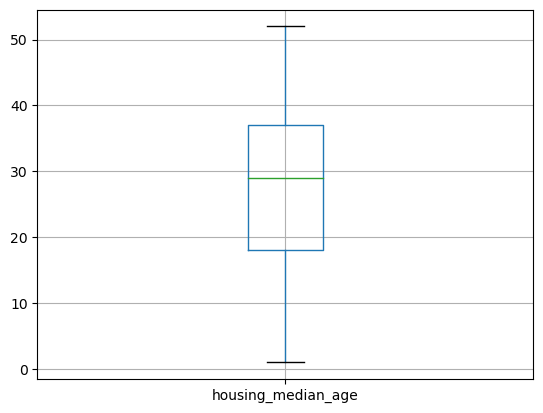

In [5]:
#Visually determine if there are outliers in the housing_median_age data.
dataset_df.boxplot(column=["housing_median_age"])
plt.show()

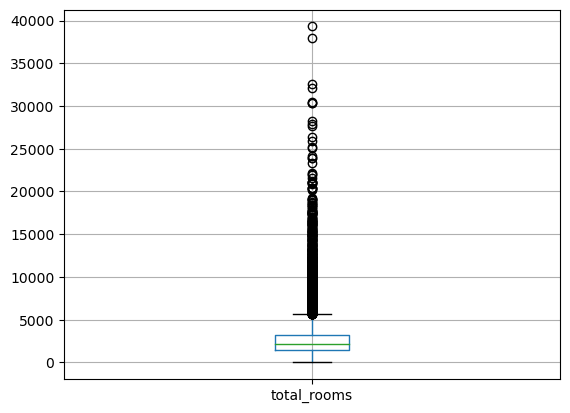

In [6]:
#Visually determine if there are outliers in the total_rooms data.
dataset_df.boxplot(column=["total_rooms"])
plt.show()

In [7]:
#Determine and remove any outliers for total_rooms.
quartiles = dataset_df["total_rooms"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

condition = (dataset_df["total_rooms"]>upper)
drop_rows = dataset_df[condition].index
f1_dataset_df = dataset_df.drop(drop_rows)
f1_dataset_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


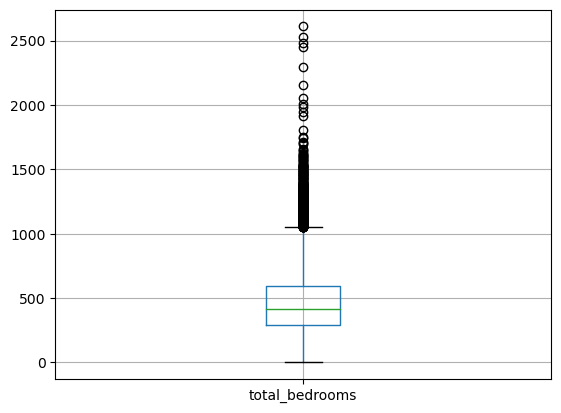

In [8]:
#Visually determine if there are outliers in the total_bedrooms data.
f1_dataset_df.boxplot(column=["total_bedrooms"])
plt.show()

In [9]:
#Determine and remove any outliers for total_bedrooms.
quartiles = f1_dataset_df["total_bedrooms"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

condition = (f1_dataset_df["total_bedrooms"]>upper)
drop_rows = f1_dataset_df[condition].index
f2_dataset_df = f1_dataset_df.drop(drop_rows)
f2_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


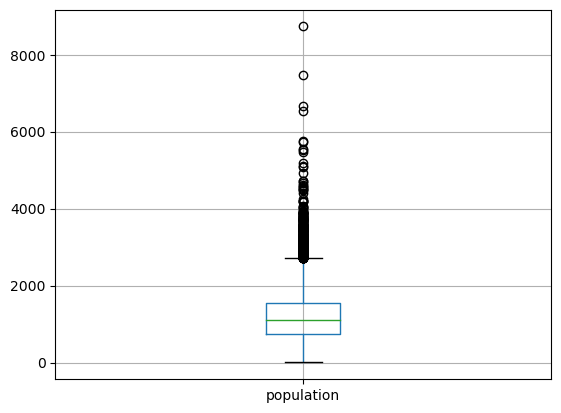

In [10]:
#Visually determine if there are outliers in the population data.
f2_dataset_df.boxplot(column=["population"])
plt.show()

In [11]:
#Determine and remove any outliers for population.
quartiles = f2_dataset_df["population"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

condition = (f2_dataset_df["population"]>upper)
drop_rows = f2_dataset_df[condition].index
f3_dataset_df = f2_dataset_df.drop(drop_rows)
f3_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


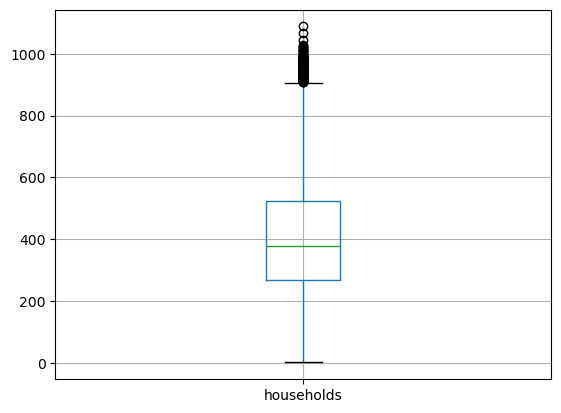

In [12]:
#Visually determine if there are outliers in the households data.
f3_dataset_df.boxplot(column=["households"])
plt.show()

In [13]:
#Determine and remove any outliers for households.
quartiles = f3_dataset_df["households"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

condition = (f3_dataset_df["households"]>upper)
drop_rows = f3_dataset_df[condition].index
f4_dataset_df = f3_dataset_df.drop(drop_rows)
f4_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY


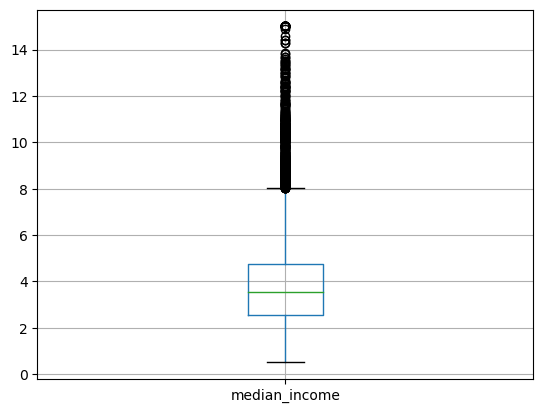

In [14]:
#Visually determine if there are outliers in the median_income data.
f4_dataset_df.boxplot(column=["median_income"])
plt.show()

In [15]:
#Determine and remove any outliers for median_income.
quartiles = f4_dataset_df["median_income"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

condition = (f4_dataset_df["median_income"]>upper)
drop_rows = f4_dataset_df[condition].index
f5_dataset_df = f4_dataset_df.drop(drop_rows)
f5_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


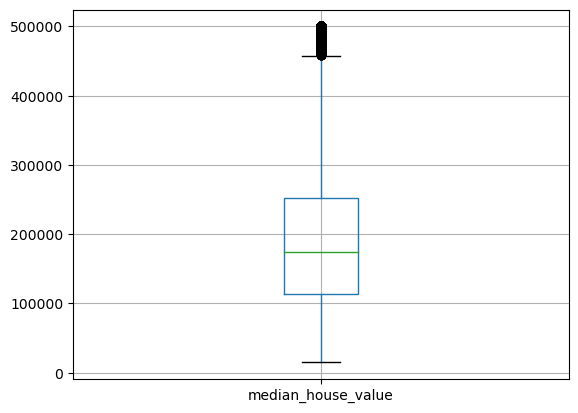

In [16]:
#Visually determine if there are outliers in the median_house_value data.
f5_dataset_df.boxplot(column=["median_house_value"])
plt.show()

In [17]:
#Determine and remove any outliers for median_house_value.
quartiles = f5_dataset_df["median_house_value"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

condition = (f5_dataset_df["median_house_value"]>upper)
drop_rows = f5_dataset_df[condition].index
final_dataset_df = f5_dataset_df.drop(drop_rows)
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [18]:
#Determine the number of unique values in each column.
final_dataset_df.nunique()

longitude               829
latitude                856
housing_median_age       52
total_rooms            4295
total_bedrooms          999
population             2535
households              904
median_income         10185
median_house_value     3545
ocean_proximity           5
dtype: int64

In [19]:
#Find the minimum longitude value for binning.
final_dataset_df["longitude"].min()

-124.35

In [20]:
#Find the maximum longitude value for binning.
final_dataset_df["longitude"].max()

-114.49

In [21]:
#Bin the longitude values.

#Create bin cutoffs
longitude_bins = [-125, -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114]

#Create bin names
longitude_names = ["-125 to -124", "-123.9 to -123", "-122.9 to -122", "-121.9 to -121", "-120.9 to -120", "-119.9 to -119", "-118.9 to -118", "-117.9 to -117", "-116.9 to -116", "-115.9 to -115", "-114.9 to -114"]

#Slice the data and place it into bins
final_dataset_df["longitude_category"] = pd.cut(final_dataset_df["longitude"], longitude_bins, labels=longitude_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122


In [22]:
#Find the minimum latitude value for binning.
final_dataset_df["latitude"].min()

32.54

In [23]:
#Find the maximum latitude value for binning.
final_dataset_df["latitude"].max()

41.95

In [25]:
#Bin the latitude values.

#Create bin cutoffs
latitude_bins = [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]

#Create bin names
latitude_names = ["32 to 33", "33.1 to 34", "34.1 to 35", "35.1 to 36", "36.1 to 37", "37.1 to 38", "38.1 to 39", "39.1 to 40", "40.1 to 41", "41.1 to 42"]

#Slice the data and place it into bins
final_dataset_df["latitude_category"] = pd.cut(final_dataset_df["latitude"], latitude_bins, labels=latitude_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38


In [26]:
#Find the minimum median_house_value for binning.
final_dataset_df["median_house_value"].min()

14999.0

In [27]:
#Find the maximum median_house_value for binning.
final_dataset_df["median_house_value"].max()

457800.0

In [28]:
#Bin the median_house_value.

#Create bin cutoffs
value_bins = [14500, 59500, 104500, 149500, 194500, 239500, 284500, 329500, 374500, 419500, 464500]

#Create bin names
value_names = ["14500-59500", "59501-104500", "104501-149500", "149501-194500", "194501-239500", "239501-284500", "284501-329500", "329501-374500", "374501-419500", "419501-464500"]

#Slice the data and place it into bins
final_dataset_df["value_category"] = pd.cut(final_dataset_df["median_house_value"], value_bins, labels=value_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500


In [29]:
#Find the maximum housing_median_age value for binning.
final_dataset_df["housing_median_age"].max()

52.0

In [30]:
#Bin the housing_median_age values.

#Create bin cutoffs
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

#Create bin names
age_names = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55"]

#Slice the data and place it into bins
final_dataset_df["median_age_category"] = pd.cut(final_dataset_df["housing_median_age"], age_bins, labels=age_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55


In [31]:
#Find the maximum total_rooms value for binning.
final_dataset_df["total_rooms"].max()

5675.0

In [32]:
#Bin the total_rooms values.

#Create bin cutoffs
rooms_bins = [0, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000]

#Create bin names
rooms_names = ["0-600", "601-1200", "1201-1800", "1801-2400", "2401-3000", "3001-3600", "3601-4200", "4201-4800", "4801-5400", "5401-6000"]

#Slice the data and place it into bins
final_dataset_df["total_rooms_category"] = pd.cut(final_dataset_df["total_rooms"], rooms_bins, labels=rooms_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category,total_rooms_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55,601-1200
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55,2401-3000


In [33]:
#Find the maximum total_bedrooms value for binning.
final_dataset_df["total_bedrooms"].max()

1053.0

In [34]:
#Bin the total_bedrooms values.

#Create bin cutoffs
bedrooms_bins = [0, 110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]

#Create bin names
bedrooms_names = ["0-110", "111-220", "221-330", "331-440", "441-550", "551-660", "661-770", "771-880", "881-990", "991-1100"]

#Slice the data and place it into bins
final_dataset_df["total_bedrooms_category"] = pd.cut(final_dataset_df["total_bedrooms"], bedrooms_bins, labels=bedrooms_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category,total_rooms_category,total_bedrooms_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,111-220
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55,601-1200,111-220
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55,2401-3000,441-550


In [35]:
#Find the maximum population value for binning.
final_dataset_df["population"].max()

2717.0

In [36]:
#Bin the population values.

#Create bin cutoffs
population_bins = [0, 275, 550, 825, 1100, 1375, 1650, 1925, 2200, 2475, 2750]

#Create bin names
population_names = ["0-275", "276-550", "551-825", "826-1100", "1101-1375", "1376-1650", "1651-1925", "1926-2200", "2201-2475", "2476-2750"]

#Slice the data and place it into bins
final_dataset_df["population_category"] = pd.cut(final_dataset_df["population"], population_bins, labels=population_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category,total_rooms_category,total_bedrooms_category,population_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,111-220,276-550
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55,601-1200,111-220,276-550
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55,2401-3000,441-550,826-1100


In [37]:
#Find the maximum households value for binning.
final_dataset_df["households"].max()

906.0

In [38]:
#Bin the households values.

#Create bin cutoffs
households_bins = [0, 95, 190, 285, 380, 475, 570, 665, 760, 855, 950]

#Create bin names
households_names = ["0-95", "96-190", "191-285", "286-380", "381-475", "476-570", "571-665", "666-760", "761-855", "856-950"]

#Slice the data and place it into bins
final_dataset_df["households_category"] = pd.cut(final_dataset_df["households"], households_bins, labels=households_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category,total_rooms_category,total_bedrooms_category,population_category,households_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,111-220,276-550,96-190
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825,191-285
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825,191-285
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55,601-1200,111-220,276-550,191-285
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55,2401-3000,441-550,826-1100,476-570


In [39]:
#Find the maximum median_income value for binning.
final_dataset_df["median_income"].max()

8.0158

In [40]:
#Bin the median_income values.

#Create bin cutoffs
median_income_bins = [0, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1]

#Create bin names
median_income_names = ["0-0.9", "0.9001-1.8", "1.8001-2.7", "2.7001-3.6", "3.6001-4.5", "4.5001-5.4", "5.4001-6.3", "6.3001-7.2", "7.2001-8.1"]

#Slice the data and place it into bins
final_dataset_df["median_income_category"] = pd.cut(final_dataset_df["median_income"], median_income_bins, labels=median_income_names, include_lowest=True)

#View the updated dataset
final_dataset_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category,total_rooms_category,total_bedrooms_category,population_category,households_category,median_income_category
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,111-220,276-550,96-190,7.2001-8.1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825,191-285,5.4001-6.3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825,191-285,3.6001-4.5
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55,601-1200,111-220,276-550,191-285,3.6001-4.5
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55,2401-3000,441-550,826-1100,476-570,3.6001-4.5


In [41]:
#Drop original columns that were binned.
final_dataset_df = final_dataset_df.drop(columns=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income", "median_house_value"])
final_dataset_df.head()

,ocean_proximity,longitude_category,latitude_category,value_category,median_age_category,total_rooms_category,total_bedrooms_category,population_category,households_category,median_income_category
2,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,111-220,276-550,96-190,7.2001-8.1
3,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825,191-285,5.4001-6.3
4,NEAR BAY,-122.9 to -122,37.1 to 38,329501-374500,51-55,1201-1800,221-330,551-825,191-285,3.6001-4.5
5,NEAR BAY,-122.9 to -122,37.1 to 38,239501-284500,51-55,601-1200,111-220,276-550,191-285,3.6001-4.5
6,NEAR BAY,-122.9 to -122,37.1 to 38,284501-329500,51-55,2401-3000,441-550,826-1100,476-570,3.6001-4.5


In [42]:
#Convert categorical data to numeric (0's and 1's).
conv_dataset_df = pd.get_dummies(final_dataset_df[["ocean_proximity","longitude_category","latitude_category","value_category","median_age_category","total_rooms_category","total_bedrooms_category","population_category","households_category","median_income_category"]])
conv_dataset_df.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude_category_-125 to -124,longitude_category_-123.9 to -123,longitude_category_-122.9 to -122,longitude_category_-121.9 to -121,longitude_category_-120.9 to -120,...,households_category_856-950,median_income_category_0-0.9,median_income_category_0.9001-1.8,median_income_category_1.8001-2.7,median_income_category_2.7001-3.6,median_income_category_3.6001-4.5,median_income_category_4.5001-5.4,median_income_category_5.4001-6.3,median_income_category_6.3001-7.2,median_income_category_7.2001-8.1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
#Split processed data into features and target arrays
y = conv_dataset_df[["value_category_14500-59500", "value_category_59501-104500", "value_category_104501-149500", "value_category_149501-194500", "value_category_194501-239500", "value_category_239501-284500", "value_category_284501-329500", "value_category_329501-374500", "value_category_374501-419500", "value_category_419501-464500"]]
x = conv_dataset_df.drop(columns=["value_category_14500-59500", "value_category_59501-104500", "value_category_104501-149500", "value_category_149501-194500", "value_category_194501-239500", "value_category_239501-284500", "value_category_284501-329500", "value_category_329501-374500", "value_category_374501-419500", "value_category_419501-464500"])

#Split the processed data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)


In [45]:
#Create a StandardScaler instance
scaler = StandardScaler()

#Fit the StandardScaler
x_scaler = scaler.fit(x_train)

#Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)